In [1]:
import numpy as np

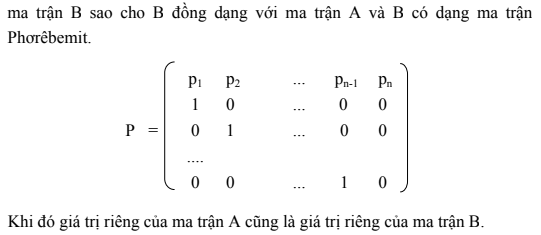

In [107]:
B = np.array([[1,2,3,4],
             [2,1,2,3],
             [3,2,1,2],
             [4,3,2,1]])

In [87]:
A = np.array([[2,1,0],
             [1,3,1],
             [0,1,2]])


In [12]:
np.shape(A)[0]

3

# Eigenvalues

In [217]:
def Danielevski(A):
    n = np.shape(A)[0]
    list_M = []
    for i in range(n-1,0,-1):
        M = np.eye(n)
        M_inverse = np.eye(n)
        
        M[i-1,:] = A[i,:]
        list_M.append(M)
        if A[i,i-1] != 0:
            for j in range(n):
                if j == i-1:
                    M_inverse[i-1,j] = 1/A[i,i-1]
                else:
                    M_inverse[i-1,j] = -A[i,j]/A[i,i-1]
            A = M@A@M_inverse
            A = np.where(np.abs(A) < 1e-10, 0, A)
        elif sum(abs(A[i,:i])) == 0:
            print(A[i,i])
            A = Danielevski(A[:n,:n])
        print(f'A{n-i}\n={A}\n---------------------------------------')
    coefficients = ((-1)**n)*np.insert(-A[0,:], 0, 1)
    print(f'Pt đặc trưng: p(λ) = {coefficients} = 0 ')
    return np.roots(coefficients),list_M

In [210]:
def test_Eigenvalues(A,eva_array):
    n = np.shape(A)[0]
    is_true = np.zeros(n)
    for i in range(len(eva_array)):
        zero = np.linalg.det(A-eva_array[i]*np.eye(n))
        zero = zero if abs(zero) >= 1e-5 else 0
        if zero == 0:
            is_true[i] = 1
        else:
            print(zero)
    return is_true

In [197]:
test = np.array([[6.1,1.0,5.1],
                 [1.0,0.5,6.1],
                 [5.1,6.1,7.2]])

In [226]:
eva_array,list_M = Danielevski(test)
eva_array

A1
=[[ 5.26393443  0.16393443  3.91967213]
 [30.39606557  8.53606557 53.60032787]
 [ 0.          1.          0.        ]]
---------------------------------------
A2
=[[  13.8     13.65  -163.006]
 [   1.       0.       0.   ]
 [   0.       1.       0.   ]]
---------------------------------------
Pt đặc trưng: p(λ) = [  -1.      13.8     13.65  -163.006] = 0 


array([13.94037758, -3.49042417,  3.35004659])

In [211]:
test_Eigenvalues(test,np.array([13.94037758, -3.49042417,  3.35004659]))

array([1., 1., 1.])

In [224]:
eva_array,list_M = Danielevski(A)
eva_array

A1
=[[ 2.  1. -2.]
 [ 1.  5. -5.]
 [ 0.  1.  0.]]
---------------------------------------
A2
=[[  7. -14.   8.]
 [  1.   0.   0.]
 [  0.   1.   0.]]
---------------------------------------
Pt đặc trưng: p(λ) = [ -1.   7. -14.   8.] = 0 


array([4., 2., 1.])

In [214]:
test_Eigenvalues(A,np.array([4., 2., 1.]))

array([1., 1., 1.])

# Eigenvectors

In [223]:
def Danielevski_vector(A,eva_array,list_M):
    M = list_M[-1]
    list_vectors = []
    for matrix in reversed(list_M[:-1]):
        M = M@matrix
    M = np.transpose(M)
    
    for eigenvalue in eva_array:
        mat_eigenvalue = np.array([eigenvalue ** i for i in range(np.shape(M)[0]-1, -1, -1)])
        x = M@mat_eigenvalue
        list_vectors.append(x)
    return list_vectors

In [225]:
Danielevski_vector(A,eva_array,list_M)

[array([16., 84., 89.]), array([ 4., 22., 25.]), array([1., 6., 8.])]

In [227]:
Danielevski_vector(test,eva_array,list_M)

[array([14438.21793453, 10204.01429596, 22461.45537083]),
 array([ 882.89252595,  613.08039144, 1377.65192827]),
 array([ 846.78773952,  604.80711261, 1316.4171009 ])]